# <font color=green>Author: Safoora Naureen</font>

# <font color=darkmagenta>Prediction using Supervised ML</font>

## <font color=darkmagenta>Aim</font>

**This project aims to predict the percentage of marks of a student based on the number of hours the student studies using simple linear regression.**

## <font color=darkmagenta>Importing Libraries</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## <font color=darkmagenta>Loading dataset</font>

In [2]:
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)

dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
dataset.shape

(25, 2)

## <font color=darkmagenta>Exploratory Data Analysis</font>

In [4]:
df = dataset.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


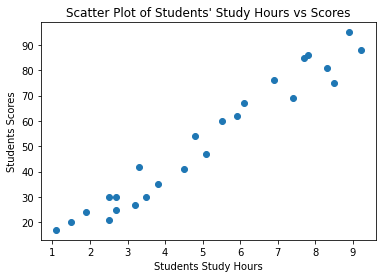

In [6]:
plt.scatter(x =df.Hours, y = df.Scores)
plt.xlabel("Students Study Hours")
plt.ylabel("Students Scores")
plt.title("Scatter Plot of Students' Study Hours vs Scores")
plt.show()

## <font color=darkmagenta>Splitting dataset</font>

In [7]:
X = df.drop("Scores", axis = "columns")
y = df.drop("Hours", axis = "columns")
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

shape of X =  (25, 1)
shape of y =  (25, 1)


## <font color=darkmagenta>Splitting dataset in train and test</font>

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=51)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (20, 1)
shape of y_train =  (20, 1)
shape of X_test =  (5, 1)
shape of y_test =  (5, 1)


## <font color=darkmagenta>Model Building</font>

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [10]:
regressor.coef_

array([[9.56433743]])

In [11]:
regressor.intercept_

array([2.70197068])

In [12]:
y_pred  = regressor.predict(X_test)
y_pred

array([[55.30582657],
       [76.34736893],
       [68.69589898],
       [82.08597139],
       [28.52568176]])

## <font color=darkmagenta>Comparing Results</font>

In [13]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,5.5,60.0,55.305827
1,7.7,85.0,76.347369
2,6.9,76.0,68.695899
3,8.3,81.0,82.085971
4,2.7,30.0,28.525682


## <font color=darkmagenta>Plotting Results</font>

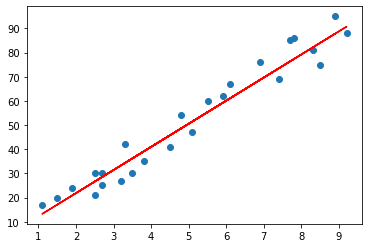

In [14]:
plt.scatter(X,y)
plt.plot(X_train, regressor.predict(X_train), color = "r")

## <font color=darkmagenta>Evaluating Model</font>

In [15]:
regressor.score(X_test,y_test)

0.9238518102278781

In [16]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, y_pred)

4.642239029818247

## <font color=darkmagenta>Answer for 9.5 hrs/day </font>

In [17]:
regressor.predict([[9.5]])[0][0].round(2)

93.56

**The student can get 93.56% after studying 9.5 hrs/day**